**PROBLEM**

Our project's goal is to develop a predictive model that can forecast if a hotel reservation will be canceled or not for an online hotel booking system. This is important for hotels because cancellations have an impact on revenue and operational planning. The dataset includes many booking-related information. Firstly, we preprocess the data by addressing missing values, noise in the data, and feature engineering and selection. In the end, we train a model to determine if a reservation is being canceled or not, assess its performance with appropriate metrics, and interpret the model by examining its most crucial characteristics in relation to cancellations of hotel reservations.

**OBJECTIVES**

-Explore the dataset.

-Preprocess the data.

-Build a predictive model.

-Evaluate different performance metrics.


**Imoprting Libraries**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset 
df = pd.read_csv("Hotel Reservations.csv")

In [3]:
#loading first few rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Dataset Description**

Booking_ID: Unique booking id for each booking.

no_of_adults: Number of adults.

no_of_children: Number of children.

no_of_weekend_nights: Number of weekend nights (Saturday and Sunday)for which the booking is made.

no_of_week_nights: Number of week nights (Monday to Friday)for which the booking is made.

type_of_meal_plan: Type of meal plan booked by the guest.

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room booked by the guest.

arrival_year: Year of arrival date.

arrival_month: Month of arrival date.

arrival_date: Date of the month.

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking.

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking.

avg_price_per_room: Average price per day of the reservation.

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

**Dataset OverView**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Here, in the dataset we have 36275 entries, 18 features and 1 target label. The dataset contains 5 object type cloumns representing categorical value and all other columns contain integers and floats. 
Also, the dataset has no missing values.

In [5]:
#Summary statistic for numerical variales
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Here, after studying the summary statistic we can see that no_of_adults and avg_price_per_room have noises as the min of both the values being 0 doesn't quite make sense so these features need some filtering. Also, the maximum no_of_children of 10 for a booking is also unusal, this might be an  outlier or might require further domain study to determine the context.

**Data Preprocessing**

An essential step in any machine learning project is data preprocessing. It involves cleaning, filtering and converting raw information into a format that machine learning algorithms can comprehend.

**Feature Selection and Engineering**

In the Feature Selection and Engineering step, we prepare the dataset for modeling by performing several crucial activities:

-Dropping Irrelevant Features.

-Dropping High Cardinality Features.

-Dropping Directly Related Features.(to prevent data leakage and promote fair evaluation)

In [6]:
#Booking_ID has high cardinality so we drop it
df.drop('Booking_ID',axis=1,inplace=True)

In [7]:
'''Market_segment_type is irrelevant to our study because we are trying to build a model for an online booking system that
makes prediction for online bookings so dropping this column helps to generalize the data set for online bookings so for our
study we have decided to drop this column. However, for other different studies this might be a relevant feature.'''
df.drop('market_segment_type',axis=1,inplace=True)

In [8]:
'''The arrival_year feature only includes a few years, and if we want to build a model that generalizes well to future data,
it is better not to include features that could bias the model. Therefore, we drop it.'''
df.drop('arrival_year',axis=1,inplace=True)

The dataset has no missing values so we do not have to consider handling it.

**Handling Noises**

In [9]:
df.avg_price_per_room.value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

avg_price_per_room has value equal to 0.0 which is irrelevant to the study and value starting from 50 is considered for our study so, we filter values below 50.

In [10]:
filter= (df['avg_price_per_room']<50)
df=df[~filter]
df.reset_index(inplace=True,drop=True)

no_of_adults=0 is irrelevant to our study so, we filter it.

In [11]:
filter = (df['no_of_adults']==0) & (df['no_of_children']>=1)
df = df[~filter]
df.reset_index(inplace=True,drop=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35260 entries, 0 to 35259
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          35260 non-null  int64  
 1   no_of_children                        35260 non-null  int64  
 2   no_of_weekend_nights                  35260 non-null  int64  
 3   no_of_week_nights                     35260 non-null  int64  
 4   type_of_meal_plan                     35260 non-null  object 
 5   required_car_parking_space            35260 non-null  int64  
 6   room_type_reserved                    35260 non-null  object 
 7   lead_time                             35260 non-null  int64  
 8   arrival_month                         35260 non-null  int64  
 9   arrival_date                          35260 non-null  int64  
 10  repeated_guest                        35260 non-null  int64  
 11  no_of_previous_

**Data Visualization**

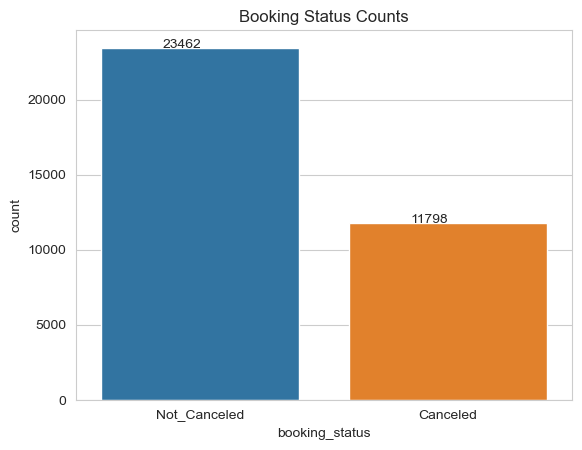

In [13]:
#visualizing booking status
sns.set_style("whitegrid")
ax = sns.countplot(x='booking_status',data=df)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Booking Status Counts");

In [14]:
df['booking_status'].value_counts(normalize=True) * 100

Not_Canceled    66.539989
Canceled        33.460011
Name: booking_status, dtype: float64

Here, the percentage of cancellations is 33.46% and non-cancellations is 66.54%. This indicates that there is some imbalance in the target variable, but it is not highly imbalanced. Generally, a dataset is considered highly imbalanced if one class represents over 80-90% of the data. In this case, the minority class (canceled) is still well-represented, so it may not be necessary to apply any resampling techniques (e.g., oversampling, undersampling) to balance the classes.

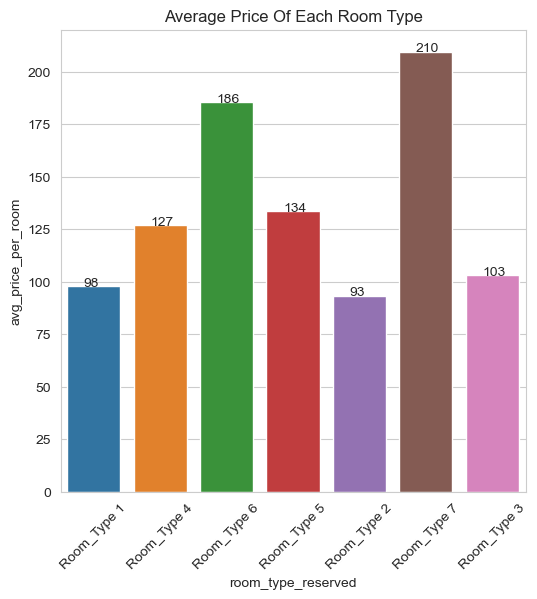

In [15]:
#average price of each room type
plt.figure(figsize=(6,6))
ax = sns.barplot(x='room_type_reserved', y='avg_price_per_room',data=df,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, )
plt.title("Average Price Of Each Room Type")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

Text(0.5, 1.0, 'Booking Status By Months')

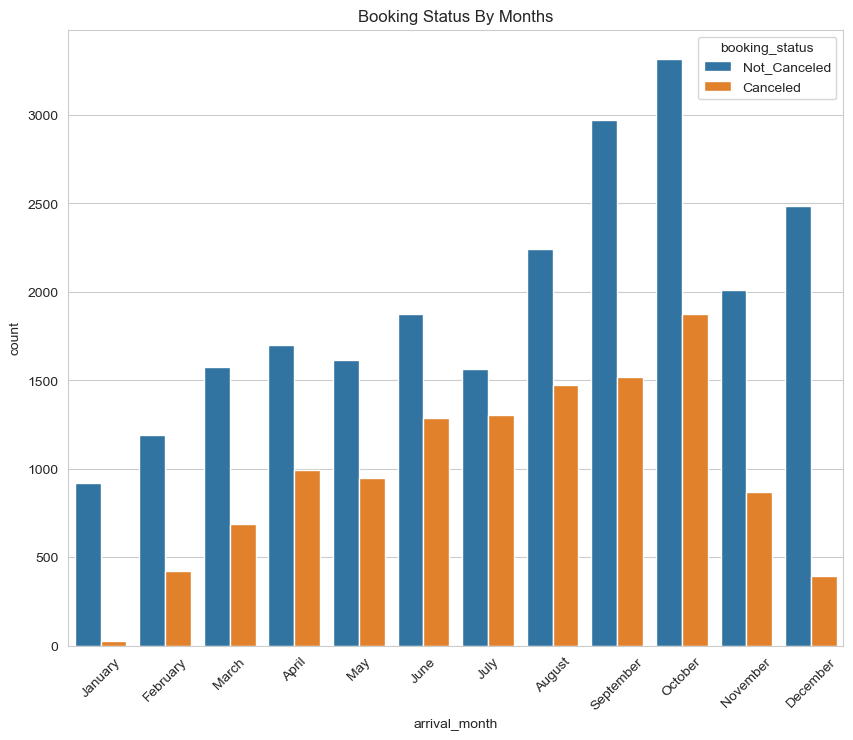

In [16]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.arrival_month,hue=df.booking_status)
plt.xticks(np.arange(0,12),["January","February","March","April","May","June",
                           "July","August","September","October","November","December"],rotation=45)
plt.title("Booking Status By Months")

From the above bar graph we can conclude that the reservation being canceled in the month of december and january is very low considering the number of bookings. There are noticeable bookings during summer and winter.  

In [17]:
df.arrival_month.value_counts()

10    5191
9     4493
8     3714
6     3161
12    2884
11    2882
7     2866
4     2690
5     2558
3     2265
2     1614
1      942
Name: arrival_month, dtype: int64

Text(0.5, 1.0, 'Lead Time and Cancellation')

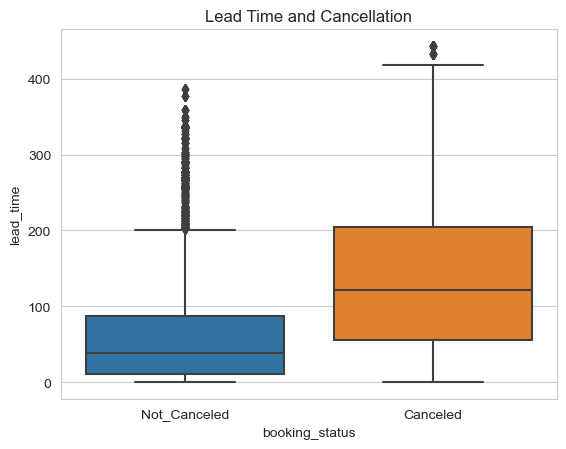

In [18]:
sns.boxplot(x=df.booking_status,y= df.lead_time)
plt.title("Lead Time and Cancellation")

The box plot helps us to state that a longer lead time increases the chance of cancellation

<Axes: xlabel='lead_time'>

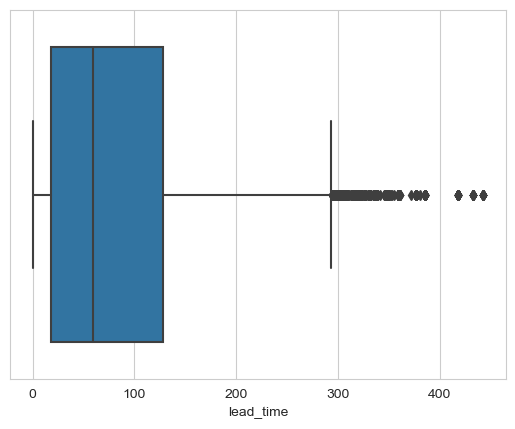

In [19]:
sns.boxplot(x=df.lead_time)

The boxplot helps us define lead_time greater than 300 as outliers. Considering our ML project for an online booking system we remove lead_time greater than 365.

In [20]:
#removing outliers
df = df[df['lead_time']<=365]
df.reset_index(inplace=True,drop=True)

Text(0.5, 1.0, 'Number of Special Request and Booking Status')

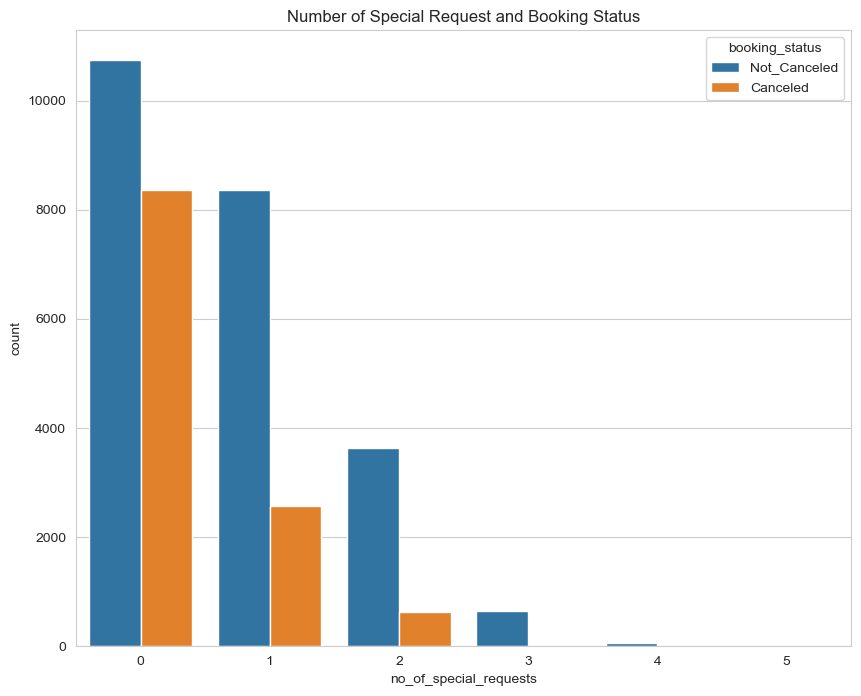

In [21]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.no_of_special_requests, hue=df.booking_status)
plt.title("Number of Special Request and Booking Status")

Here, the increase in special requests decreases the probability of booking getting cancelled.

<Axes: xlabel='repeated_guest', ylabel='Count'>

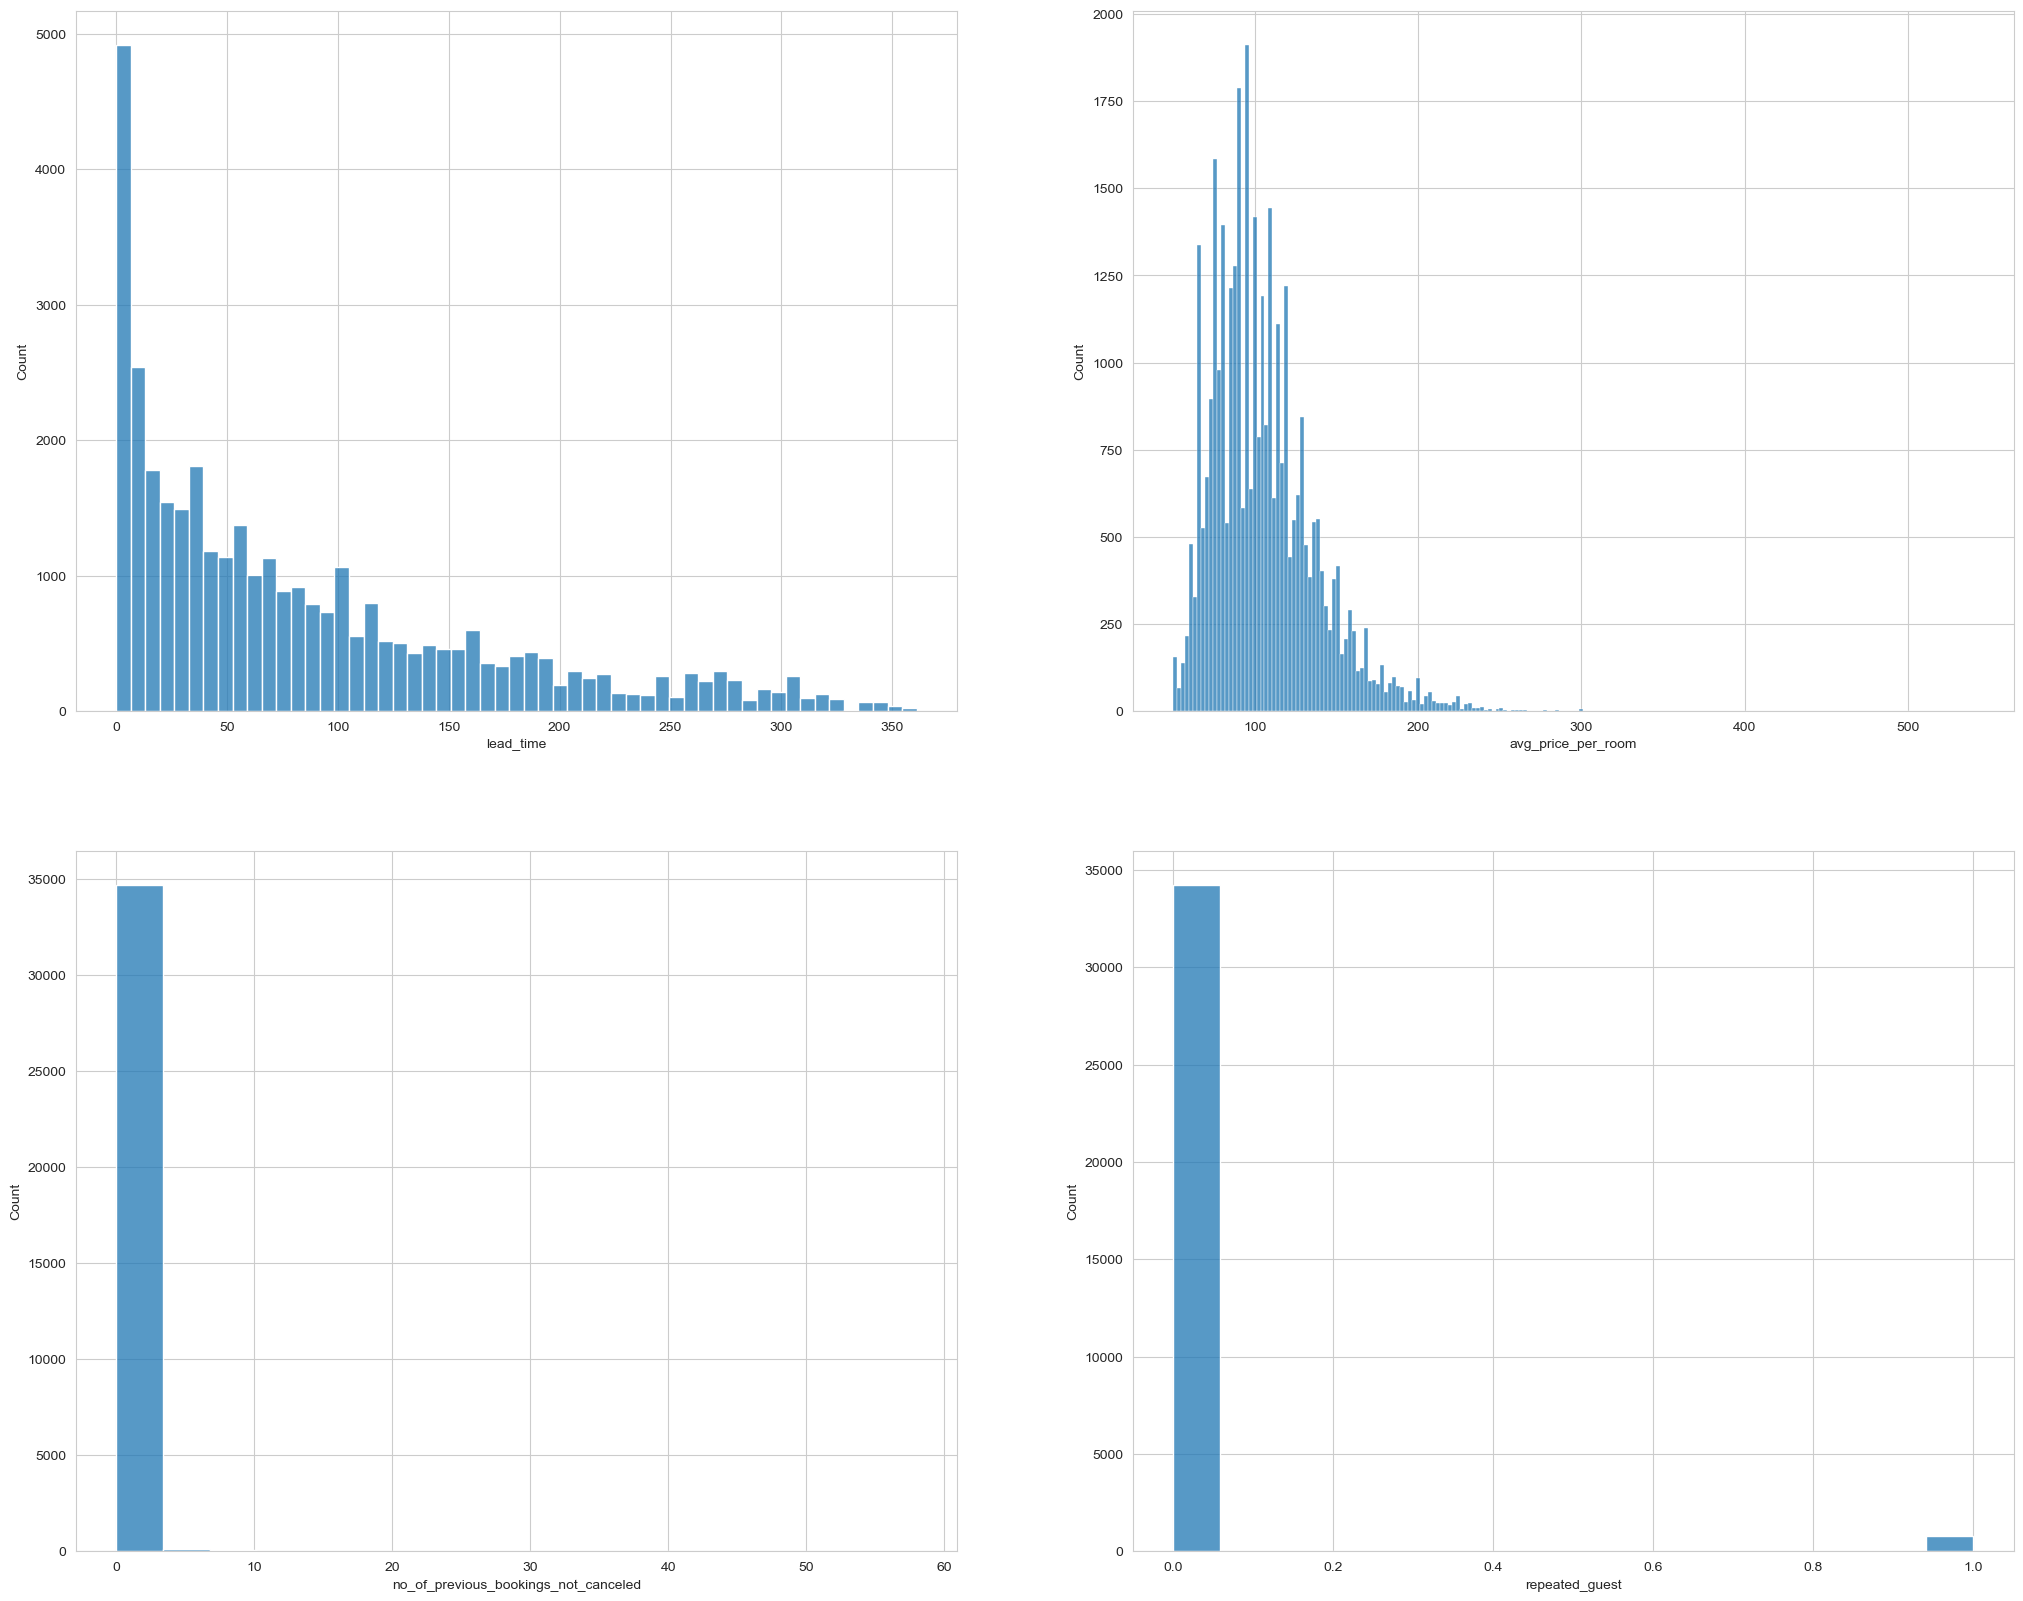

In [22]:
plt.figure(figsize = (25,20))


plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)


plt.subplot(2,2,4)
sns.histplot(df['repeated_guest'], kde = False)

Here, we can see that mostly the reservations are made without taking too long. The avg_price_per_room is more concentrated around 100 euros and most guests have no previous cancellations indicating more number of new non-repeated guest.

**Bivarate Analysis**

<Axes: xlabel='booking_status', ylabel='count'>

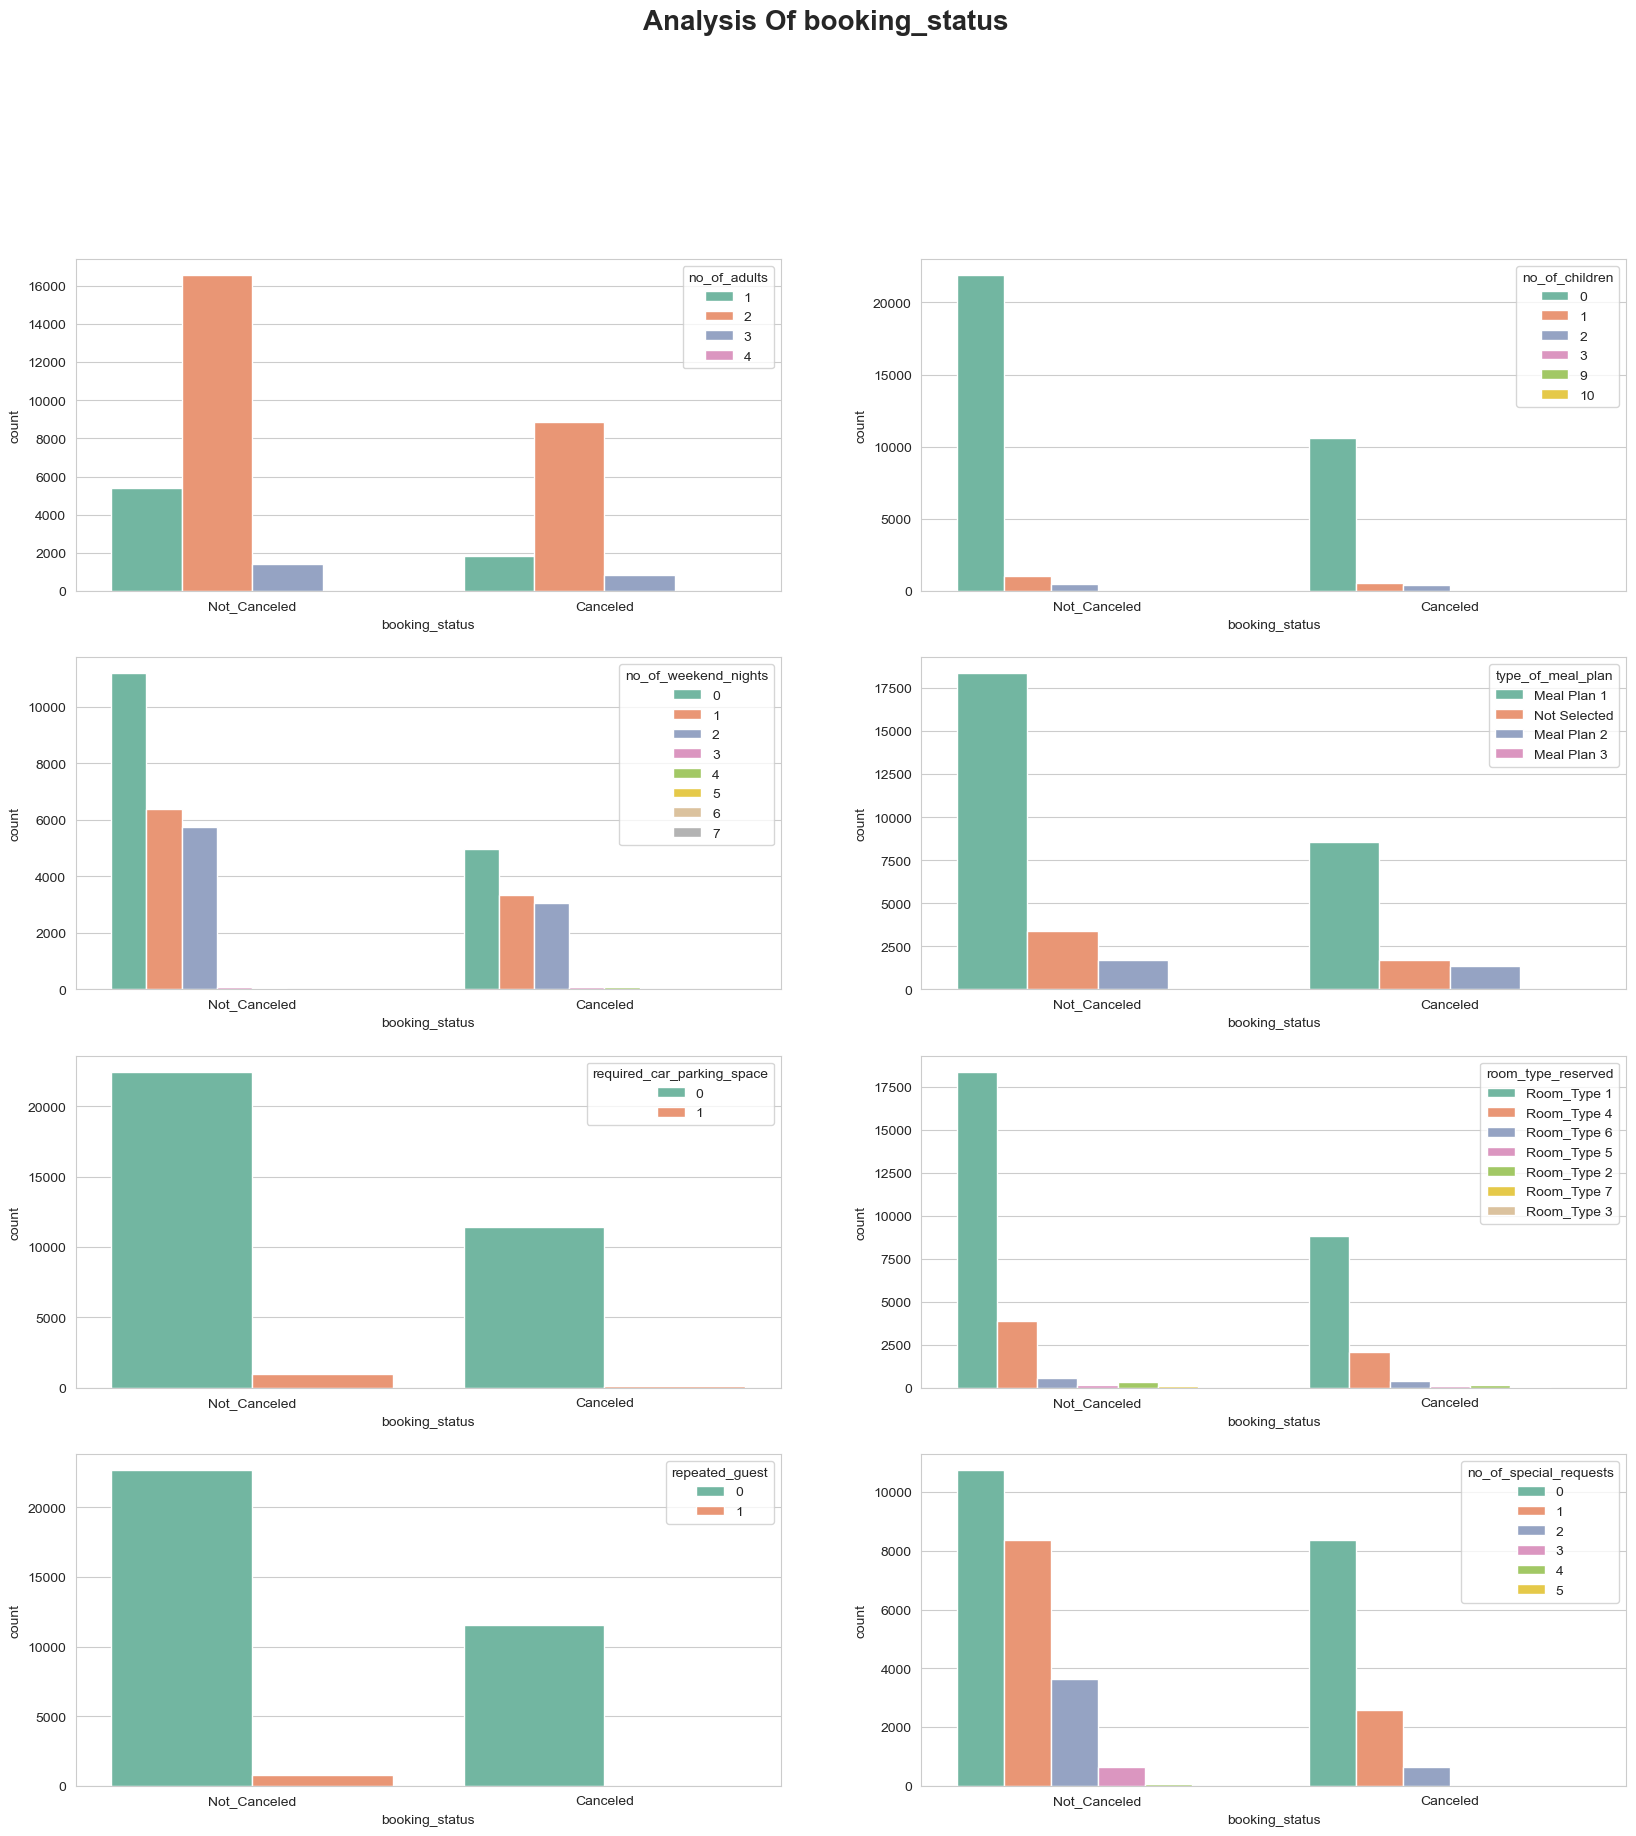

In [23]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)


The above plots help us determine that repeated guests have less chances of cancelling, the guests that have made special requests are less likely to cancel, and the guests that have requested for parking space are also less likely to cancel. 

**Encoding Categorical Variables**

**Label Encoding**

Here, we have label encoded type_of_meal_plan, room_type_reserved, and bookig_status

In [24]:
df['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Meal Plan 1':0 ,'Meal Plan 2': 2,'Meal Plan 3': 3, 'Not Selected': 1})
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 0,    
'Room_Type 4': 1,    
'Room_Type 6': 2,     
'Room_Type 2': 3,     
'Room_Type 5': 4,     
'Room_Type 7': 5,    
'Room_Type 3': 6})

In [25]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled':0,'Canceled':1})
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,10,2,0,0,0,65.00,0,0
1,2,0,2,3,1,0,0,5,11,6,0,0,0,106.68,1,0
2,1,0,2,1,0,0,0,1,2,28,0,0,0,60.00,0,1
3,2,0,0,2,0,0,0,211,5,20,0,0,0,100.00,0,1
4,2,0,1,1,1,0,0,48,4,11,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35014,3,0,2,6,0,0,1,85,8,3,0,0,0,167.80,1,0
35015,2,0,1,3,0,0,0,228,10,17,0,0,0,90.95,2,1
35016,2,0,2,6,0,0,0,148,7,1,0,0,0,98.39,2,0
35017,2,0,0,3,1,0,0,63,4,21,0,0,0,94.50,0,1


In [26]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000,35019.000000
mean,1.859676,0.099489,0.816585,2.223736,0.319170,0.031126,0.315514,84.252149,7.416260,15.564037,0.022159,0.021446,0.128530,105.784780,0.619207,0.330335
std,0.505113,0.388060,0.870915,1.405850,0.626021,0.173661,0.718204,82.315647,3.055137,8.750352,0.147204,0.364907,1.653492,32.396161,0.785221,0.470340
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,18.000000,5.000000,8.000000,0.000000,0.000000,0.000000,81.500000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,58.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,10.000000,23.000000,0.000000,0.000000,0.000000,121.500000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,361.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


Standardizing lead_time and avg_price_per_room using z-score 

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaled_variable = df[['lead_time','avg_price_per_room']]

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(scaled_variable)

StandardScaler()

In [31]:
scaled= scaler.transform(scaled_variable)

In [32]:
df_scaled = pd.DataFrame(scaled,columns=['lead_time','avg_price_per_room'])

In [33]:
df.drop(['lead_time','avg_price_per_room'],axis=1,inplace=True)

In [34]:
df = pd.concat([df,df_scaled],axis=1)

In [35]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,booking_status,lead_time,avg_price_per_room
0,2,0,1,2,0,0,0,10,2,0,0,0,0,0,1.697731,-1.258957
1,2,0,2,3,1,0,0,11,6,0,0,0,1,0,-0.962797,0.027634
2,1,0,2,1,0,0,0,2,28,0,0,0,0,1,-1.011391,-1.413298
3,2,0,0,2,0,0,0,5,20,0,0,0,0,1,1.539800,-0.178566
4,2,0,1,1,1,0,0,4,11,0,0,0,0,1,-0.440410,-0.348342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35014,3,0,2,6,0,0,1,8,3,0,0,0,1,0,0.009085,1.914304
35015,2,0,1,3,0,0,0,10,17,0,0,0,2,1,1.746325,-0.457924
35016,2,0,2,6,0,0,0,7,1,0,0,0,2,0,0.774443,-0.228264
35017,2,0,0,3,1,0,0,4,21,0,0,0,0,1,-0.258182,-0.348342


**Model Building with Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
X=df.drop('booking_status',axis=1)
y=df['booking_status']

In [38]:
#train_test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [39]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
predictions = rf.predict(X_test)

In [41]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      4666
           1       0.88      0.79      0.83      2338

    accuracy                           0.90      7004
   macro avg       0.89      0.87      0.88      7004
weighted avg       0.89      0.90      0.89      7004



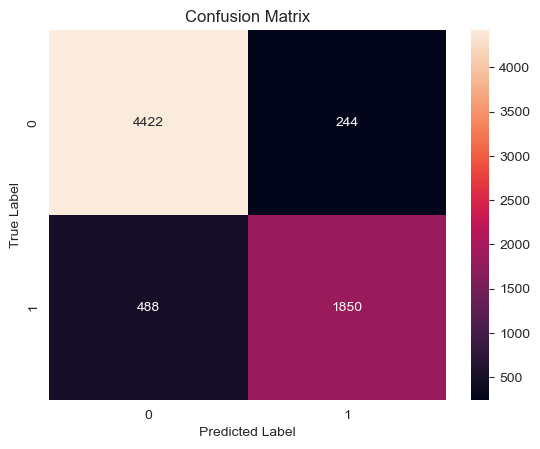

In [42]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label");

Here, 4422 non-cancellations out of 4666 were correctly predicted and 1850 cancellations out of 2338  were correctly predicted using random-forest classifier.